<a href="https://colab.research.google.com/github/SedatParlak/tensorflow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in TensorFlow

There are many definition for a regression problem but in our case, we're goint to simplfy it: prediction a numerical variable based on combination of other variables. Even shorter, predicting a number...

In [16]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

2.12.0


## Creating data to view and fit

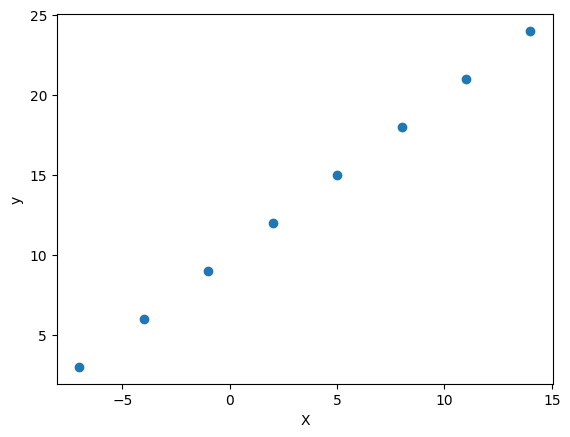

In [17]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize features and labels
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [18]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [19]:
# Let's check the input and output shape (Note that these shapes are not correct one)
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [20]:
# Let's check another input and output shape (Note that these shapes are not correct one)
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

As you see above, it seems our inputs and outputs have no shape. Let's turn numpy arrays to tensors for finding correct shape.

In [21]:
# Turn numpy array to tensors
X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [22]:
# Check tensor shapes
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with Tensorflow

1. **Creating a model** - define input and output layer, as well as the hidden layers of deep learning model.
2. **Compiling  a model** - define the loss function (in other words, the function which tells our model how wrong it is) and optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performanse of our model)
3. **Fitting a model** - letting the model try to find patterns features and labels

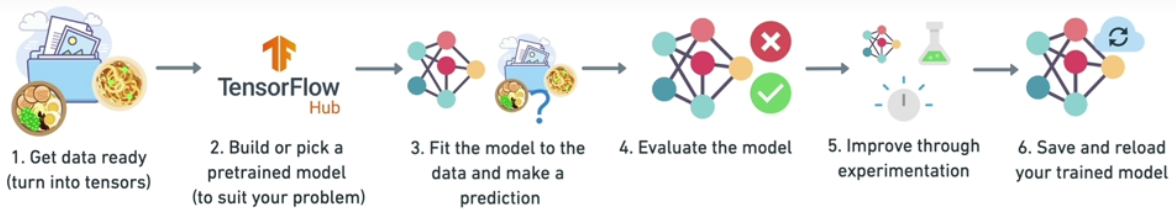

In [27]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling a model
model.compile(
    loss=tf.keras.losses.mae, # mae short for mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD short for stochastic gradient descent
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 325ms/step - loss: 11.8569 - mae: 11.8569
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.7244 - mae: 11.7244
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.5919 - mae: 11.5919
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.4594 - mae: 11.4594
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3269 - mae: 11.3269


In [28]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [33]:
# Try to make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 43ms/step


array([[11.005553]], dtype=float32)

Our expection for 17.0 is 27.0 but model prediction is 11.00. This is so bad prediction.

## Improving Model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (called neuron) within each of the hidden layers, change the activation function of each layer
2. **Compiling a model** - Here we might change the optimization function or perhaps the learning rate of the optimization function
3. **Fitting a model** - Here we might change the number of epoch (leave it training for longer) or more data (give the model more example to learn from)